## Objective:

At a high level, we want to answer the following questions:
- Measure the performance of the stock.
- Analyze the stocks and develop a strategy
- Risk of investment in specific stocks
- which stocks to buy right now? and for how long?

## Information Source

### 1. Finviz
It is well well-known free source of information related to the stock market and companies. Moreover, it has news articles, that can be leveraged to further prediction of the market.

There are two python packages: (1) finviz(most stared, but not good)  (2) finvizfinance (USEFUL)

Some important links related to finvizfinance
1. Doc: https://finvizfinance.readthedocs.io/en/latest/

In [1]:
# get price of a stock (lets say "VOO" Vangaurd S&P 500)
ticker = "VOO"

## Beta

Think about risk into two categories. 

1) systematic risk, which is the risk of the entire market declining.
   Example: The financial crisis in 2008 is an example of a systematic-risk event; no amount of diversification could have prevented investors from losing value in their stock portfolios. Systematic risk is also known as un-diversifiable risk.

2) Unsystematic risk, also known as diversifiable risk, is the uncertainty associated with an individual stock or industry.
   Example, the surprise announcement that the company Lumber Liquidators (LL) had been selling hardwood flooring with dangerous levels of formaldehyde in 2015 is an example of unsystematic risk. Lumber Liquidators. "Lumber Liquidators Provides Update On Laminate Flooring Sourced From China."
It was risk that was specific to that company. **Unsystematic risk can be partially mitigated through diversification**.

NOTE: **Beta cannot estimate Unsystematic Risk.**

#### Beta = 1.0
Price activity is strongly correlated with the market. A stock has systematic risk. 

Adding a stock to a portfolio: **doesn’t add any risk to the portfolio, also doesn’t increase the likelihood that the portfolio will provide an excess return.**

#### Beta < 1.0
Theoretically less volatile than the market. 

Adding this stock to a portfolio: **makes it less risky.** For example, utility stocks often have low betas because they tend to move more slowly than market averages.

#### Beta > 1.0
Price is theoretically more volatile than the market. For example, if a stock's beta is 1.2, it is assumed to be 20% more volatile than the market. 

Example: Technology stocks and small cap stocks tend to have higher betas than the market benchmark. This indicates that adding the stock to a portfolio will increase the portfolio’s risk, but may also increase its expected return.

#### Beta < 0
A beta of -1.0 means that the stock is inversely correlated to the market benchmark on a 1:1 basis. This stock could be thought of as an opposite, mirror image of the benchmark’s trends. 

Example: **Put options and inverse ETFs are designed to have negative betas.** There are also a few industry groups, like gold miners, where a negative beta is also common.

#### Assumtion in Beta
Assumes that stock returns are normally distributed from a statistical perspective. 
However, **financial markets are prone to large surprises**. In reality, returns aren’t always normally distributed. 

NOTE: **It's recommended that investors using beta to evaluate a stock also evaluate it from other perspectives—such as fundamental or technical factors—before assuming it will add or remove risk from a portfolio.**

#### Drawbacks/Limitation of Beta
- **Beta is useful in determining a security's short-term risk, and for analyzing volatility to arrive at equity costs when using the CAPM.**
- Beta is less meaningful for investors looking to predict a stock's future movements.
- Beta is also less useful for long-term investments since a stock's volatility can change significantly from year to year
- Beta of a particular stock tends to jump around over time, which makes it unreliable as a stable measure.
- Many experts agree that while Beta provides some information about risk, it is not an effective measure of risk on its own.

In [2]:
from finvizfinance.quote import finvizfinance as fin

In [3]:
stock = fin(ticker)

In [4]:
stock.ticker_news()

,Date,Title,Link
0,2023-08-13 12:48:00,"Big-box earnings, retail sales, Fed minutes: W...",https://finance.yahoo.com/news/big-box-earning...
1,2023-06-17 19:28:00,This Simple but Effective Fund Is 2023s Most P...,https://finance.yahoo.com/news/simple-effectiv...
2,2023-03-15 12:00:00,Allan Roth: Is Direct Indexing Better Than ETFs?,https://finance.yahoo.com/news/allan-roth-dire...
3,2023-02-28 14:45:00,Small ETFs Gaining Traction in 2023,https://finance.yahoo.com/news/fastest-growing...
4,2023-02-09 16:00:00,Zero Fee ETF Crosses $1B in AUM for First Time,https://finance.yahoo.com/news/zero-fee-etf-cr...
...,...,...,...
95,2020-06-23 17:37:00,Most Popular ETFs on Robinhood,https://finance.yahoo.com/news/most-popular-et...
96,2020-06-10 00:00:00,Robinhood's Favorite ETFs,https://finance.yahoo.com/news/robinhoods-favo...
97,2020-06-08 15:56:00,Recessions: 10 Facts You Must Know,https://finance.yahoo.com/news/recessions-10-f...
98,2020-05-24 07:07:00,2020 Stock Market Holidays and Bond Market Hol...,https://finance.yahoo.com/news/2020-stock-mark...


In [5]:
stock.ticker_fundament().get('Price')

'387.39'

In [6]:
stock.info.keys()

dict_keys(['news', 'fundament'])

In [7]:
stock.ticker_charts()

'https://finviz.com/chart.ashx?t=VOO&ty=c&ta=1&p=d'

The finviz is useful to collect non-time series data OR data at current point of time. Use yfinance or pandas_datareader to capture stock prices.

Use past 2 year's price and compare. Older data have huge impact of Covid, and other macroscopic factors.

## yfinance
Github: https://github.com/ranaroussi/yfinance

In [8]:
import yfinance as yf
from datetime import datetime

In [9]:
ticker='msft'
msft = yf.Ticker(ticker)

In [10]:
msft.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [11]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [12]:
# index funds like voo does not show outstanding shares
outstandingShare = msft.info.get('sharesOutstanding') 
outstandingShare

7429760000

In [13]:
msft.splits # show split history

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

A stock split happens when a company increases the number of its shares to boost the stock's liquidity. Although the number of shares outstanding increases by a specific multiple, the total dollar value of all shares outstanding remains the same because a split does not fundamentally change the company's value. 

A company elects to perform a stock split to intentionally lower the price of a single share, making the company's stock more affordable without losing value.

In [14]:
#msft.recommendations # not implemented, hence use another package

In [15]:
dvdnd = msft.dividends # divident history per share
dvdnd

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-08-17 00:00:00-04:00    0.62
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
Name: Dividends, Length: 79, dtype: float64

In [16]:
type(dvdnd)

pandas.core.series.Series

In [17]:
import pandas as pd
df = pd.DataFrame(dvdnd)

In [18]:
df.head()

,Dividends
Date,
2003-02-19 00:00:00-05:00,0.08
2003-10-15 00:00:00-04:00,0.16
2004-08-23 00:00:00-04:00,0.08
2004-11-15 00:00:00-05:00,3.08
2005-02-15 00:00:00-05:00,0.08


In [19]:
df = df.resample('Y').sum() # resample the data based on year and sum the value

In [20]:
df.reset_index(inplace=True) # reset index will let Date be a column
df['Year'] = df['Date'].dt.year.astype('int32')

In [21]:
df

,Date,Dividends,Year
0,2003-12-31 00:00:00-05:00,0.24,2003
1,2004-12-31 00:00:00-05:00,3.16,2004
2,2005-12-31 00:00:00-05:00,0.32,2005
3,2006-12-31 00:00:00-05:00,0.37,2006
4,2007-12-31 00:00:00-05:00,0.41,2007
5,2008-12-31 00:00:00-05:00,0.46,2008
6,2009-12-31 00:00:00-05:00,0.52,2009
7,2010-12-31 00:00:00-05:00,0.55,2010
8,2011-12-31 00:00:00-05:00,0.68,2011
9,2012-12-31 00:00:00-05:00,0.83,2012


In [22]:
# plot the dividend with time
import matplotlib.pyplot as plt

In [23]:
df[df['Year']%2==0]['Year']

1     2004
3     2006
5     2008
7     2010
9     2012
11    2014
13    2016
15    2018
17    2020
19    2022
Name: Year, dtype: int32

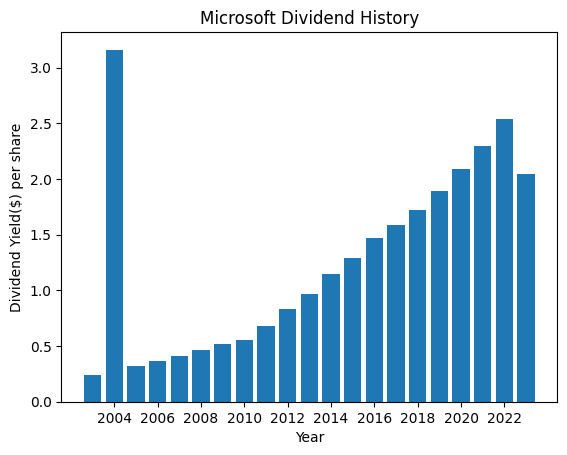

In [24]:
#plot
plt.bar(df['Year'], df['Dividends'])
plt.xlabel('Year')
plt.ylabel('Dividend Yield($) per share')
plt.title('Microsoft Dividend History')
plt.xticks(df[df['Year']%2==0]['Year'])
plt.show()

Year 2004, Microsoft paid special one-time 3$ dividend. Reason is microsoft resolved some of the legal issues that year and shared the profit.

In [25]:
msft.major_holders # majority of shares are hold by institution

/opt/homebrew/lib/python3.11/site-packages/yfinance/scrapers/holders.py:39: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  holders = pd.read_html(resp.text)


,0,1
0,0.05%,% of Shares Held by All Insider
1,73.21%,% of Shares Held by Institutions
2,73.25%,% of Float Held by Institutions
3,6255,Number of Institutions Holding Shares


In [26]:
# which institues hold max shares
msft.institutional_holders.sort_values(by='Shares', ascending=False)

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,653247546,2023-06-29,0.0879,204721258009
1,Blackrock Inc.,536245027,2023-06-29,0.0722,168053836866
2,State Street Corporation,293614078,2023-06-29,0.0395,92015720205
3,"FMR, LLC",210111250,2023-06-29,0.0283,65846767715
4,Price (T.Rowe) Associates Inc,159904219,2023-06-29,0.0215,50112385534
5,"Geode Capital Management, LLC",148129470,2023-06-29,0.0199,46422296773
6,Morgan Stanley,123498322,2023-06-29,0.0166,38703140940
7,JP Morgan Chase & Company,113024837,2023-06-29,0.0152,35420855323
8,Norges Bank Investment Management,86316926,2022-12-30,0.0116,27050862703
9,Capital World Investors,85507261,2023-06-29,0.0115,26797121777


In [27]:
from datetime import date, timedelta

In [28]:
df = yf.download('MSFT', 
                      start=date.today() - timedelta(days=500), 
                      end=date.today(), 
                      progress=False)

In [29]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,255.490005,261.500000,253.429993,260.649994,257.609161,33175400
2022-05-24,257.890015,261.329987,253.500000,259.619995,256.591217,29043900
2022-05-25,258.140015,264.579987,257.130005,262.519989,259.457397,28547900
2022-05-26,262.269989,267.109985,261.429993,265.899994,262.797943,25002100
2022-05-27,268.480011,273.339996,267.559998,273.239990,270.052338,26910800


In [31]:
# Get RSI
# Choose a look-back period (e.g., 14 days)
look_back_period = 14

# Calculate daily price changes
df['Price Change'] = df['Close'].diff()

# Separate positive and negative price changes
df['Gain'] = df['Price Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

# Calculate average gains and losses
average_gain = df['Gain'].rolling(window=look_back_period).mean()
average_loss = df['Loss'].rolling(window=look_back_period).mean()

# Calculate the RS (Relative Strength)
rs = average_gain / average_loss

# Calculate the RSI
rsi = 100 - (100 / (1 + rs))

# Add the RSI column to the DataFrame
df['RSI'] = rsi

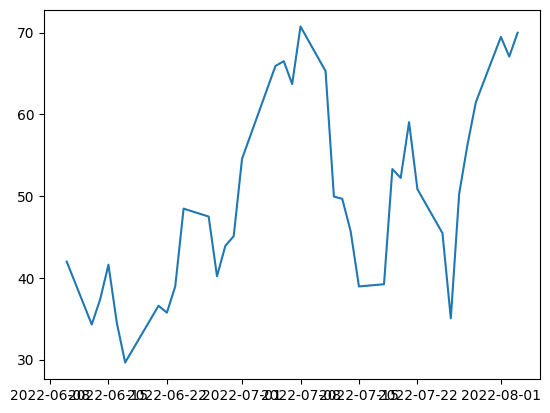

In [32]:
plt.plot(df['RSI'][:50])

<div>
<img src=attachment:55ff0ad2-a367-4779-bbcc-8a884cde16fb.jpg width=800 />
<div>

- Low RSI (below 30) -> generate buy signals; downward trend, indicate an oversold or undervalued condition. (bearish Market) 
- High RSI (above 70)-> generate sell signals; upward trend; overbought or overvalued (bullished market )
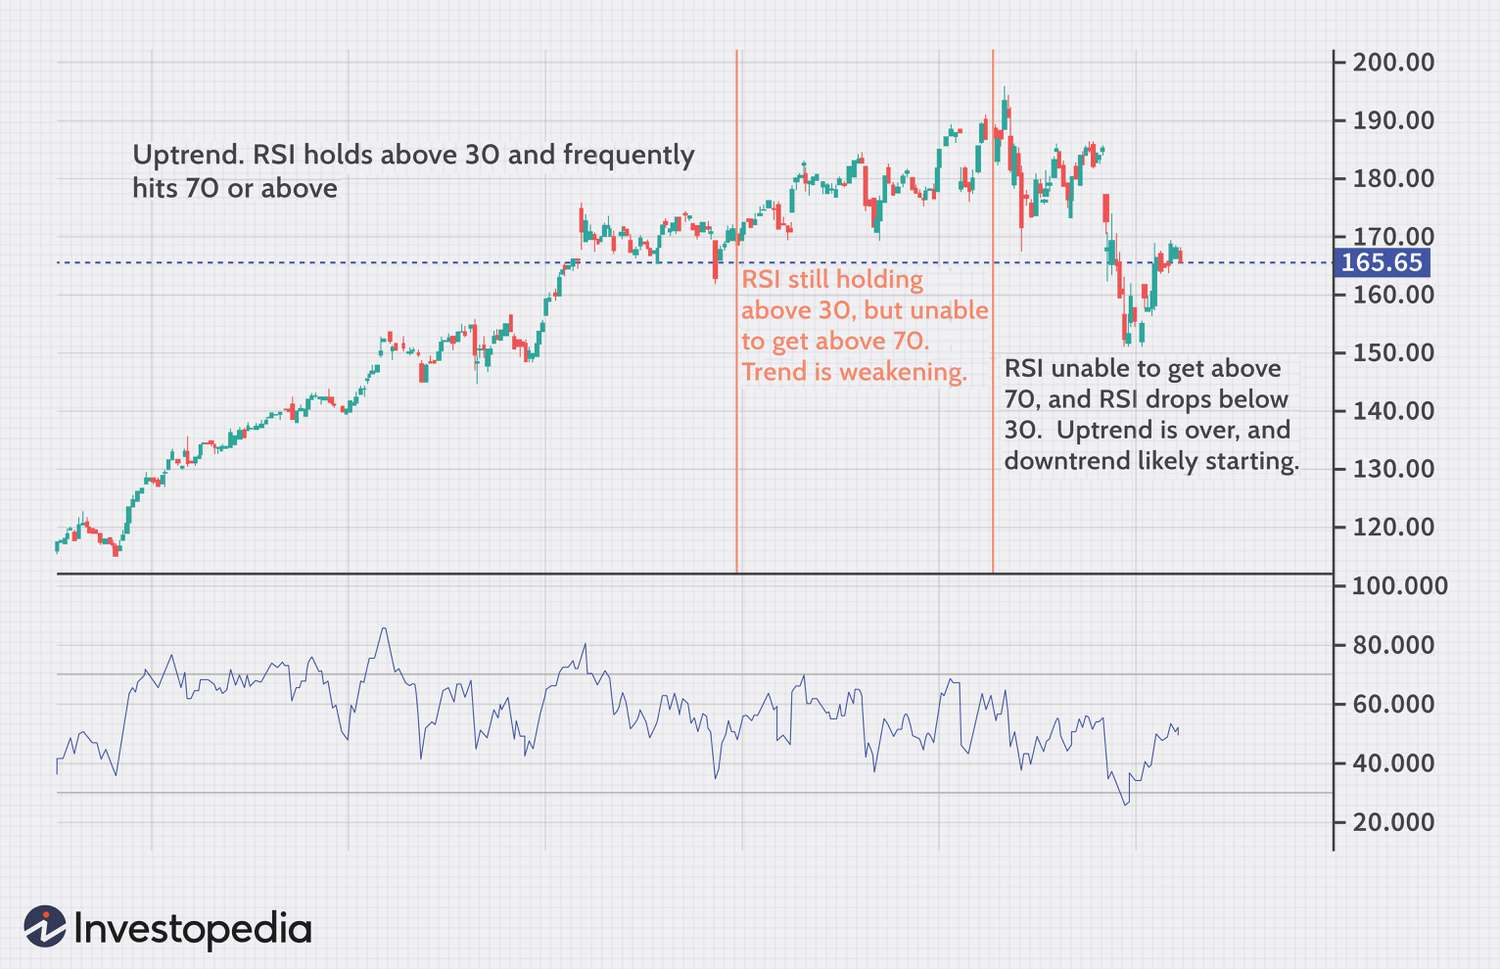

In [74]:
# MFI (money flow index)
look_back_period = 14

# Calculate typical price for each day
df['Typical Price'] = (df['High'] + df['Low'] + df['Close']) / 3

# Calculate raw money flow (RMF)
df['Raw Money Flow'] = df['Typical Price'] * df['Volume']

# Calculate the money flow ratio (MFR)
positive_money_flow = (df['Typical Price'] > df['Typical Price'].shift(1))*1*df['Raw Money Flow']
negative_money_flow = (df['Typical Price'] < df['Typical Price'].shift(1))*1*df['Raw Money Flow']
mfr = positive_money_flow.rolling(window=look_back_period).sum() / negative_money_flow.rolling(window=look_back_period).sum()

# Calculate the Money Flow Index (MFI)
mfi = 100 - (100 / (1 + mfr))

# Add the MFI column to the DataFrame
df['MFI'] = mfi

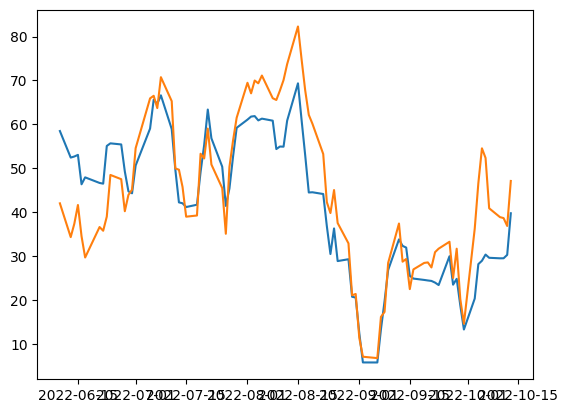

In [76]:
plt.plot(df['MFI'][:100])
plt.plot(df['RSI'][:100])

Both RSI and MFI similar in nature, however MFI also incorporate volume. Hence, **MFI is better indicator than RSI.** 

**Sell when the MFI rises above 70 as it indicates an overbought condition and buy when the MFI falls below 30 as it indicates an oversold condition.**

Objective: gain max profit out from portfolios, Minimize the rix

How to achieve this objective? by accurate prediction of stocks movement

What are the factors? 
(1) market is moved in herd, so knowing what people are rushing will set trend for few minutes (I assume next x mins, for each stock this x will vary). This is mostly true for index funds as it is primerly moved with market and top stocks. 

(2) long term trend is game of patience, it depends on whats companies vision is, what kind of project they are doing and internal stuff. Today's initiative will decide future of the company. That requires depth research. 

### 2. ta (Technical Analysis)

It is a Python package that provides various technical analysis indicators, that can be used to find probability of trend

1: Github: https://github.com/bukosabino/ta

There are many technical indicators that traders and investors use to analyze individual stocks. Here's a list of some common technical indicators along with their formulas:

1. **Moving Average (MA):**
   - Formula: MA = (Sum of Closing Prices for n periods) / n
   - Description: A simple moving average smooths out price data over a specified number of periods to identify trends.

2. **Exponential Moving Average (EMA):**
   - Formula: EMA = (Closing Price - EMA(previous day)) * (2 / (1 + n)) + EMA(previous day)
   - Description: EMA gives more weight to recent prices, making it more responsive to recent price changes.

3. **Relative Strength Index (RSI):**
   - Formula: RSI = 100 - (100 / (1 + RS))
     where RS = (Average Gain / Average Loss)
   - Description: RSI measures the speed and change of price movements. It ranges from 0 to 100, with values above 70 indicating overbought conditions and values below 30 indicating oversold conditions.

4. **Moving Average Convergence Divergence (MACD):**
   - Formula: MACD = 12-day EMA - 26-day EMA
   - Signal Line: 9-day EMA of MACD
   - Description: MACD is used to identify changes in the strength, direction, momentum, and duration of a trend.

5. **Bollinger Bands:**
   - Formula: Upper Band = SMA + (2 * Std. Deviation of Closing Prices)
              Lower Band = SMA - (2 * Std. Deviation of Closing Prices)
   - Description: Bollinger Bands consist of a middle band (SMA) and two outer bands (upper and lower) that represent volatility around the SMA.

6. **Stochastic Oscillator:**
   - Formula: %K = [(Closing Price - Lowest Low) / (Highest High - Lowest Low)] * 100
   - %D = 3-day SMA of %K
   - Description: Stochastic Oscillator measures the location of a closing price relative to its price range over a specified period.

7. **Average True Range (ATR):**
   - Formula: ATR = (Sum of True Ranges for n periods) / n
     where True Range = max(High - Low, abs(High - Previous Close), abs(Low - Previous Close))
   - Description: ATR measures market volatility by considering the average price range between the high and low prices over a specified period.

8. **Moving Average Convergence Divergence Histogram (MACD Histogram):**
   - Formula: MACD Histogram = MACD - Signal Line
   - Description: The MACD Histogram is used to identify changes in the strength and direction of the MACD.

9. **Average Directional Index (ADX):**
   - Formula: ADX = 100 * (Average of DX / Average True Range)
     where DX = 100 * (|+DI - -DI|) / (+DI + -DI)
   - Description: ADX measures the strength of a trend and is used to determine if a market is trending or ranging.

These are just a few examples of technical indicators. Keep in mind that the choice of indicators may vary depending on your trading or investment strategy, and there are many more indicators available for analyzing stock price movements. Additionally, the interpretation of these indicators should be based on the context of your analysis and market conditions.

### Independent of stock price
Technical indicators are mathematical calculations based on various data points, including price, volume, and sometimes even open interest. While many technical indicators primarily use stock price as one of their inputs, some indicators focus on other aspects like volume or price patterns without directly relying on the stock price. Here are a few such technical indicators:

1. **Volume Oscillator (VO)**:
   - Formula: `(Short-term Volume MA - Long-term Volume MA) / Long-term Volume MA`
   - Description: Measures the difference between short-term and long-term moving averages of trading volume.

2. **On-Balance Volume (OBV)**:
   - Formula: `OBV = Previous OBV + Volume` if the close is higher than the previous close, `OBV = Previous OBV - Volume` if the close is lower than the previous close, `OBV = Previous OBV` if the close is the same as the previous close.
   - Description: It accumulates volume when the price rises and subtracts volume when the price falls. It provides insight into the flow of volume relative to price.

3. **Money Flow Index (MFI)**:
   - Formula: `MFI = 100 - (100 / (1 + Money Flow Ratio))`
   - Money Flow Ratio: `(Positive Money Flow / Negative Money Flow)`
   - Positive Money Flow: Sum of Money Flow on days when the typical price is higher than the previous day.
   - Negative Money Flow: Sum of Money Flow on days when the typical price is lower than the previous day.
   - Description: It uses both price and volume to measure buying and selling pressure. It ranges from 0 to 100.

4. **Accumulation/Distribution Line (A/D Line)**:
   - Formula: `A/D Line = Previous A/D Line + Current Money Flow Volume`
   - Current Money Flow Volume: `(Close - Low) - (High - Close) / (High - Low) * Volume`
   - Description: This indicator uses volume and price data to assess the flow of funds into or out of a security.

5. **Chaikin Oscillator**:
   - Formula: `Chaikin Oscillator = (3-day EMA of Accumulation/Distribution Line) - (10-day EMA of Accumulation/Distribution Line)`
   - Description: Measures the momentum of the Accumulation/Distribution Line.

6. **Ease of Movement (EMV)**:
   - Formula: `(High - Low) / ((High + Low) / 2) * Volume`
   - Description: Designed to show how easily the price can move in the market. It doesn't depend on the actual price level.

7. **McClellan Oscillator**:
   - Formula: `(19-day EMA of Advancing Issues - 39-day EMA of Advancing Issues) - (19-day EMA of Declining Issues - 39-day EMA of Declining Issues)`
   - Description: Measures the difference between advancing and declining issues, helping to identify overbought or oversold conditions.

Please note that these indicators may still indirectly relate to stock price movements, as they often use price-related metrics such as highs, lows, and closing prices. However, they do not directly rely on the stock price itself in their formulas. Always refer to the specific documentation or source of the indicator for more precise details and parameter settings.

## Market Technical Indicator

There are numerous technical indicators used to analyze the broader stock market or specific market indices. Here's a list of some common market-related technical indicators along with their formulas:

1. **Advance-Decline Line (A/D Line):**
   - Formula: A/D Line = (Advances - Declines) + Previous A/D Line
   - Description: The Advance-Decline Line measures the number of advancing and declining stocks in the market. It can help identify the overall strength or weakness of the market.

2. **McClellan Oscillator:**
   - Formula: McClellan Oscillator = (19-day EMA of Advances - Declines) - (39-day EMA of Advances - Declines)
   - Description: The McClellan Oscillator is used to assess the market's breadth by comparing the exponential moving averages of advancing and declining issues.

3. **McClellan Summation Index:**
   - Formula: Summation Index = Previous Summation Index + McClellan Oscillator
   - Description: The McClellan Summation Index is a cumulative measure of the McClellan Oscillator and helps identify long-term trends in market breadth.

4. **Advance-Decline Volume Line:**
   - Formula: A/D Volume Line = (Advancing Volume - Declining Volume) + Previous A/D Volume Line
   - Description: Similar to the A/D Line, this indicator measures the volume of advancing and declining stocks in the market.

5. **TRIN (Arms Index):**
   - Formula: TRIN = (Advancing Issues / Declining Issues) / (Advancing Volume / Declining Volume)
   - Description: TRIN is a market breadth indicator that assesses the relationship between advancing and declining issues and their respective volume.

6. **VIX (CBOE Volatility Index):**
   - Description: The VIX, often referred to as the "Fear Gauge," measures the market's expectation of future volatility. It is calculated by the Chicago Board Options Exchange (CBOE) and does not have a simple mathematical formula.

7. **Market Breadth Index:**
   - Formula: Market Breadth Index = (Number of Advancing Stocks - Number of Declining Stocks) / Total Number of Stocks
   - Description: This index represents the proportion of advancing stocks to declining stocks in the market and can indicate the overall market sentiment.

8. **Price Rate of Change (ROC):**
   - Formula: ROC = [(Current Price - Price n periods ago) / Price n periods ago] * 100
   - Description: ROC measures the percentage change in a market index's price over a specified number of periods.

9. **Cyclically Adjusted Price-to-Earnings (CAPE) Ratio:**
   - Formula: CAPE Ratio = Current Market Price / 10-Year Average Earnings (adjusted for inflation)
   - Description: CAPE Ratio, also known as the Shiller PE Ratio, provides a long-term perspective on stock market valuation by using a 10-year average of earnings.

10. **Market Momentum Index:**
    - Formula: Market Momentum Index = 100 * (Current Close / 200-Day Moving Average) - 100
    - Description: This index measures the momentum of the market by comparing the current price to its 200-day moving average.

These are some of the key technical indicators and indices used to assess the overall health and sentiment of the stock market. Traders and investors often use a combination of these indicators to make informed decisions. Keep in mind that the interpretation of these indicators should be based on the context of your analysis and market conditions.

### Independent of stock price
Among the indicators I mentioned, the following indicators do not directly depend on the stock price itself:

Advance-Decline Line (A/D Line): The A/D Line is based on the number of advancing and declining stocks in the market, not their individual prices. It assesses market breadth rather than specific stock prices.

McClellan Oscillator: Similar to the A/D Line, the McClellan Oscillator is based on the number of advancing and declining issues, not their prices.

McClellan Summation Index: This index is a cumulative measure of the McClellan Oscillator and is also based on advancing and declining issues rather than stock prices.

Advance-Decline Volume Line: Like the A/D Line, this indicator is based on the volume of advancing and declining stocks, not their individual prices.

TRIN (Arms Index): TRIN is a market breadth indicator that compares the number of advancing and declining issues and their respective volume. It does not directly involve stock prices.

VIX (CBOE Volatility Index): The VIX measures market volatility and is derived from options prices, particularly the implied volatility of S&P 500 index options. It is not directly tied to stock prices.

Market Breadth Index: This index represents the breadth of advancing and declining stocks in the market, regardless of their individual prices.

These indicators focus on market breadth, volume, and sentiment rather than individual stock prices. They are often used to gauge the overall health and sentiment of the broader market.

## Conclusion

Based on analysis, need to try different predictor models to make decision. Lets use weak learners and combine their prediction

So far, i can think of following learners:
- Learner-1: based on MFI: if MFI>70 sell, if MFI<30 buy;
- Learner-2: based on Seasonal data(monthly data)
- Learner-3: based on latest news of the stock + overall market news (using sentiment-analysis)